In [24]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
df = pd.read_csv("spotify_data.csv")
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.392,0.476,-7.583,0.0249,0.39700,0.000163,0.3090,0.234,78.031,1xsYj84j7hUDDnTTerGWlH,267597
1,0.548,0.691,-13.553,0.0369,0.01500,0.106000,0.1440,0.667,137.145,4KfSdst7rW39C0sfhArdrz,261933
2,0.413,0.881,-5.541,0.0367,0.00006,0.000308,0.0805,0.364,158.066,5UWwZ5lm5PKu6eKsHAGxOk,250547
3,0.532,0.887,-3.757,0.0335,0.07780,0.000214,0.2940,0.795,122.511,37ZJ0p5Jm13JPevGcx4SkF,249293
4,0.545,0.640,-9.937,0.2240,0.00249,0.030400,0.1960,0.606,80.544,70YvYr2hGlS01bKRIho1HM,230480
...,...,...,...,...,...,...,...,...,...,...,...
3510,0.882,0.797,-3.299,0.0819,0.08210,0.000000,0.1130,0.824,105.025,4fsQ0K37TOXa3hEQfjEic1,184444
3511,0.625,0.712,-5.996,0.0539,0.02290,0.000000,0.2520,0.398,163.015,3IelG5zYpWWCZIH4cqWlPV,203557
3512,0.631,0.787,-5.718,0.0640,0.10400,0.000000,0.4600,0.452,99.991,5e7WT8HDdFlHQBO3ZbKvVj,184560
3513,0.804,0.771,-4.067,0.0433,0.35700,0.000003,0.1080,0.739,126.956,65FftemJ1DbbZ45DUfHJXE,212253


In [25]:
X = df.drop(['id', 'duration_ms'], axis=1)

In [26]:
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.392,0.476,-7.583,0.0249,0.39700,0.000163,0.3090,0.234,78.031
1,0.548,0.691,-13.553,0.0369,0.01500,0.106000,0.1440,0.667,137.145
2,0.413,0.881,-5.541,0.0367,0.00006,0.000308,0.0805,0.364,158.066
3,0.532,0.887,-3.757,0.0335,0.07780,0.000214,0.2940,0.795,122.511
4,0.545,0.640,-9.937,0.2240,0.00249,0.030400,0.1960,0.606,80.544
...,...,...,...,...,...,...,...,...,...
3510,0.882,0.797,-3.299,0.0819,0.08210,0.000000,0.1130,0.824,105.025
3511,0.625,0.712,-5.996,0.0539,0.02290,0.000000,0.2520,0.398,163.015
3512,0.631,0.787,-5.718,0.0640,0.10400,0.000000,0.4600,0.452,99.991
3513,0.804,0.771,-4.067,0.0433,0.35700,0.000003,0.1080,0.739,126.956


Scale the features of the dataframe

In [27]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns) # scaled the numerical feature data X
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.392,0.476,-7.583,0.0249,0.39700,0.000163,0.3090,0.234,78.031
1,0.548,0.691,-13.553,0.0369,0.01500,0.106000,0.1440,0.667,137.145
2,0.413,0.881,-5.541,0.0367,0.00006,0.000308,0.0805,0.364,158.066
3,0.532,0.887,-3.757,0.0335,0.07780,0.000214,0.2940,0.795,122.511
4,0.545,0.640,-9.937,0.2240,0.00249,0.030400,0.1960,0.606,80.544


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-1.920682,-0.968702,-0.156649,-0.790930,0.669230,-0.403534,0.825412,-1.225534,-1.744990
1,-0.830298,0.064413,-1.685787,-0.653103,-0.765818,-0.009508,-0.278100,0.599320,0.580130
2,-1.773899,0.977398,0.366383,-0.655400,-0.821943,-0.402994,-0.702785,-0.677656,1.403012
3,-0.942132,1.006229,0.823331,-0.692154,-0.529899,-0.403344,0.725093,1.138769,0.004534
4,-0.851267,-0.180651,-0.759595,1.495858,-0.812814,-0.290963,0.069673,0.342239,-1.646147


Clustering

Clustering: choosing K

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

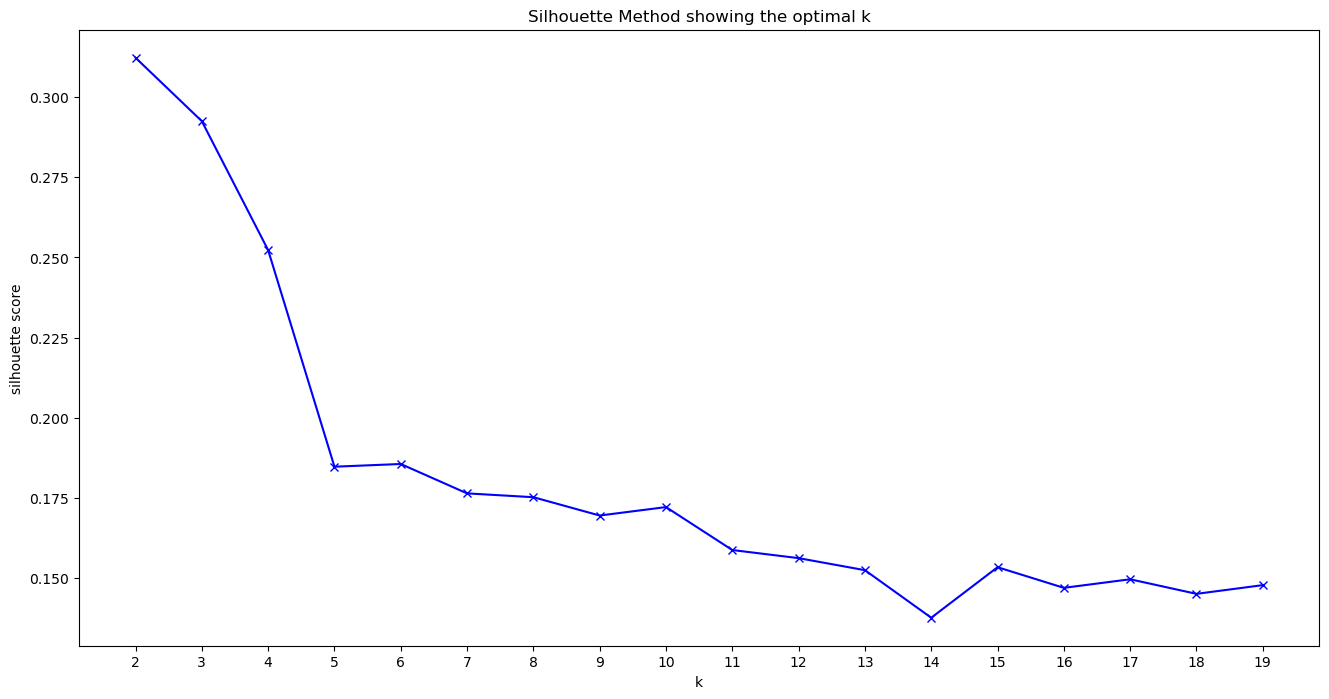

In [28]:
# Silhoutte method: pick the cluster number for the maximum Silhoutte number
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

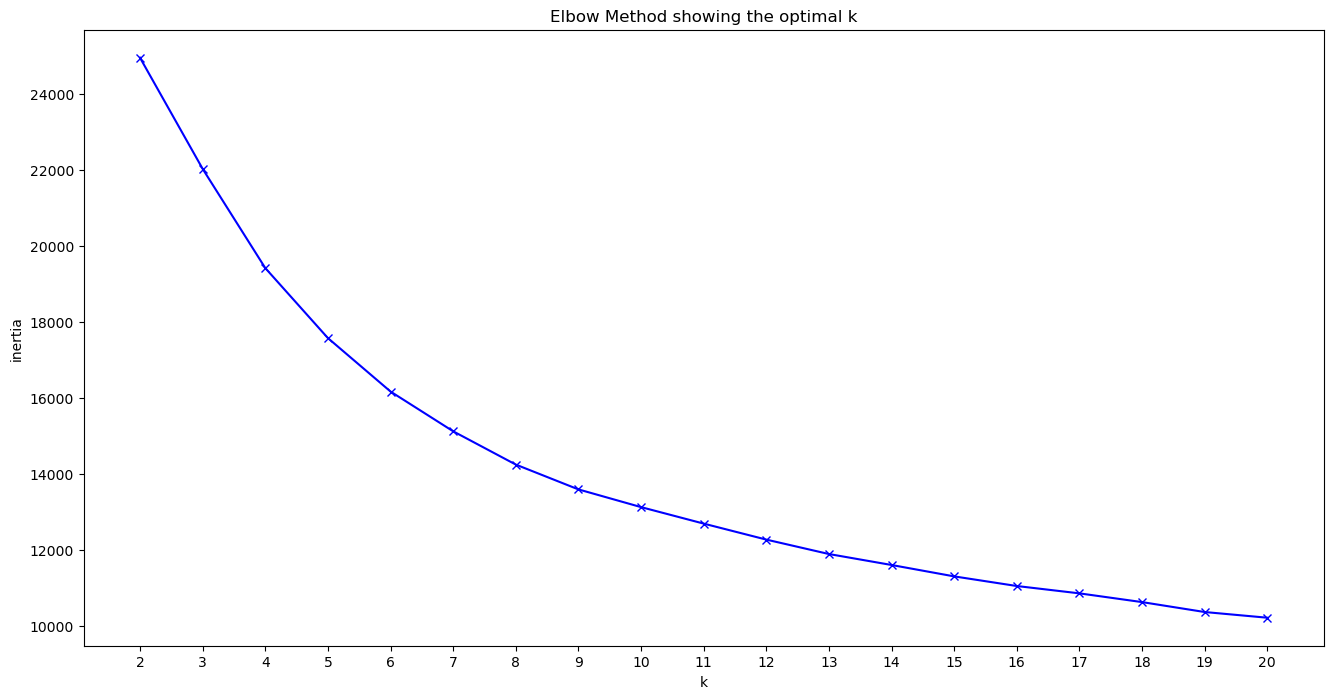

In [29]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [30]:
# Based on the plots above, let us take the number of clusters n_clusters = 10

Clustering with KMeans

In [31]:
kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=10, random_state=1234)

In [32]:
kmeans.labels_

array([5, 9, 2, ..., 1, 6, 2])

In [33]:
# Just to see how the songs are arranged in each cluster 
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    315
1    182
2    295
3    175
4    437
5    520
6    892
7    284
8    113
9    302
dtype: int64

Create another column in the dataframe df or X with the cluster labels

In [34]:
df["cluster"] = clusters
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.392,0.476,-7.583,0.0249,0.39700,0.000163,0.3090,0.234,78.031,1xsYj84j7hUDDnTTerGWlH,267597,5
1,0.548,0.691,-13.553,0.0369,0.01500,0.106000,0.1440,0.667,137.145,4KfSdst7rW39C0sfhArdrz,261933,9
2,0.413,0.881,-5.541,0.0367,0.00006,0.000308,0.0805,0.364,158.066,5UWwZ5lm5PKu6eKsHAGxOk,250547,2
3,0.532,0.887,-3.757,0.0335,0.07780,0.000214,0.2940,0.795,122.511,37ZJ0p5Jm13JPevGcx4SkF,249293,6
4,0.545,0.640,-9.937,0.2240,0.00249,0.030400,0.1960,0.606,80.544,70YvYr2hGlS01bKRIho1HM,230480,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3510,0.882,0.797,-3.299,0.0819,0.08210,0.000000,0.1130,0.824,105.025,4fsQ0K37TOXa3hEQfjEic1,184444,6
3511,0.625,0.712,-5.996,0.0539,0.02290,0.000000,0.2520,0.398,163.015,3IelG5zYpWWCZIH4cqWlPV,203557,2
3512,0.631,0.787,-5.718,0.0640,0.10400,0.000000,0.4600,0.452,99.991,5e7WT8HDdFlHQBO3ZbKvVj,184560,1
3513,0.804,0.771,-4.067,0.0433,0.35700,0.000003,0.1080,0.739,126.956,65FftemJ1DbbZ45DUfHJXE,212253,6
